In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tweedejaars_project import load_df

In [13]:
df = load_df()

df_two_sided_count = df[['datetime', 'two_sided_daily_count']][1439::1440]
df_two_sided_count = df_two_sided_count.set_index('datetime')

df_settlement_price = df[['datetime', 'settlement_price_realized']][1::15]
df_settlement_price = df_settlement_price.set_index('datetime')

df_energy_forecast = df[['datetime', 'forecast_wind', 'forecast_solar',
                         'forecast_demand']][1::15]
df_energy_forecast = df_energy_forecast.set_index('datetime')

In [5]:
df_energy_forecast.dropna(inplace=True)
df_energy_forecast['forecast_deficit'] = df_energy_forecast['forecast_demand'] - df_energy_forecast['forecast_solar'] - df_energy_forecast['forecast_wind']

two_sided_daily_count    1441
dtype: int64


<Figure size 1500x500 with 0 Axes>

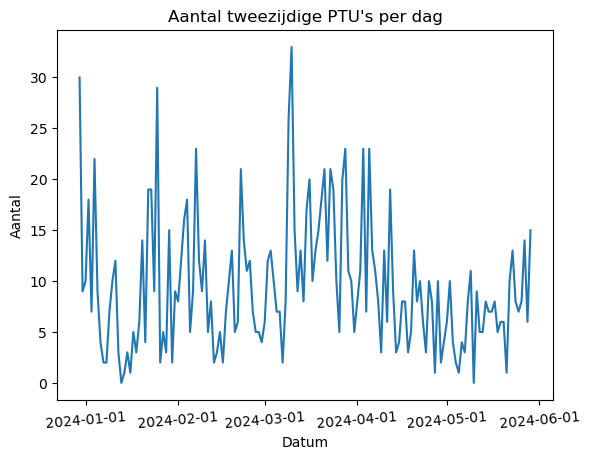

<Figure size 1500x500 with 0 Axes>

In [6]:
plt.plot(df_two_sided_count.index, df_two_sided_count['two_sided_daily_count'])

print(df_two_sided_count.sum())

plt.title('Aantal tweezijdige PTU\'s per dag')
plt.xlabel('Datum')
plt.ylabel('Aantal')

ticks = ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
         '2024-06-01']
plt.xticks(ticks)
plt.xticks(rotation=5)

plt.figure(figsize=(15,5))

<Figure size 10000x100 with 0 Axes>

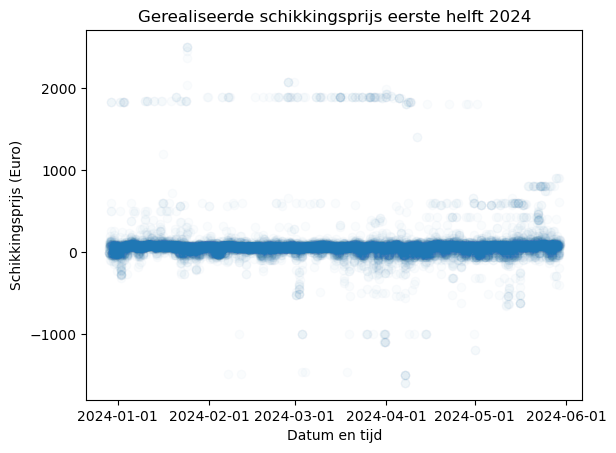

<Figure size 10000x100 with 0 Axes>

In [7]:
plt.scatter(df_settlement_price.index, 
            df_settlement_price['settlement_price_realized'], alpha=0.02)

plt.title('Gerealiseerde schikkingsprijs eerste helft 2024')
plt.xlabel('Datum en tijd')
plt.ylabel('Schikkingsprijs (Euro)')

ticks = ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
         '2024-06-01']
plt.xticks(ticks)

plt.figure(figsize=(100,1))

<Figure size 10000x100 with 0 Axes>

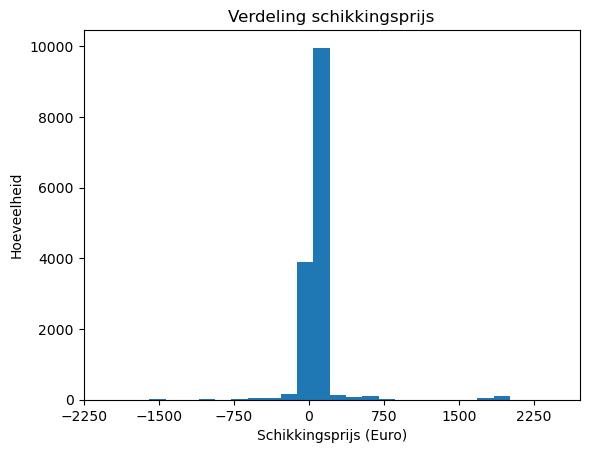

<Figure size 10000x100 with 0 Axes>

In [8]:
plt.hist(df_settlement_price['settlement_price_realized'], bins=25)

plt.title('Verdeling schikkingsprijs')
plt.xlabel('Schikkingsprijs (Euro)')
plt.ylabel('Hoeveelheid')

ticks = [750*x for x in range(-3, 4)] 
plt.xticks(ticks)
# plt.xlim(-750, 750)

plt.figure(figsize=(100,1))


14683


<Figure size 10000x100 with 0 Axes>

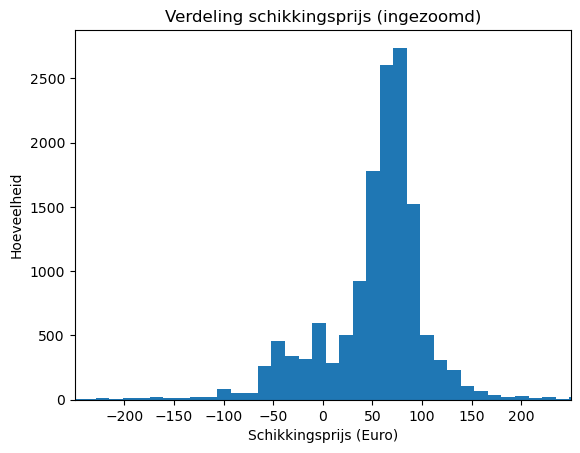

<Figure size 10000x100 with 0 Axes>

In [9]:
plt.hist(df_settlement_price['settlement_price_realized'], bins=300)
print(df_settlement_price['settlement_price_realized'].size)

plt.title('Verdeling schikkingsprijs (ingezoomd)')
plt.xlabel('Schikkingsprijs (Euro)')
plt.ylabel('Hoeveelheid')

ticks = [50*x for x in range(-4, 5)] 
plt.xticks(ticks)
plt.xlim(-250, 250)

plt.figure(figsize=(100,1))

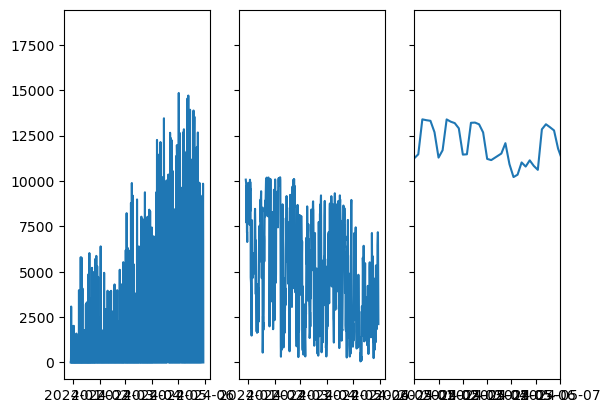

<Figure size 10000x100 with 0 Axes>

In [10]:
df_copy = df_energy_forecast.copy()
df_energy_forecast = df_copy[::16]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
plt.xlim(left=pd.Timestamp('2024-05-01'),right=pd.Timestamp('2024-05-07'))
plt.figure(figsize=(100,1))

ax1.plot(df_energy_forecast.index,df_energy_forecast['forecast_solar'])
ax2.plot(df_energy_forecast.index,df_energy_forecast['forecast_wind'])
ax3.plot(df_energy_forecast.index,df_energy_forecast['forecast_demand'])

([<matplotlib.axis.XTick at 0x7cf0dc283ce0>,
 [Text(19723.0, 0, '2024-01-01'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19783.0, 0, '2024-03-01'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19875.0, 0, '2024-06-01')])

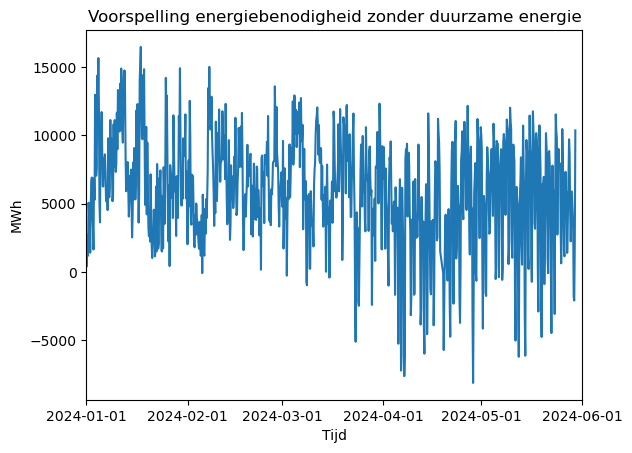

In [11]:
plt.plot(df_energy_forecast.index,df_energy_forecast['forecast_deficit'])
plt.xlim(left=pd.Timestamp('2024-05-01'),right=pd.Timestamp('2024-05-31'))
plt.title("Voorspelling energiebenodigheid zonder duurzame energie")
plt.ylabel("MWh")
plt.xlabel("Tijd")
ticks = ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
         '2024-06-01']
plt.xticks(ticks)